In [15]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_exploded = df.explode('job_skills')

In [3]:
df_jobs = df_exploded[df_exploded['job_title_short'].isin(['Data Analyst', 'Data Scientist', 'Data Engineer'])]

In [4]:
df_jobs

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,spark,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,hadoop,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


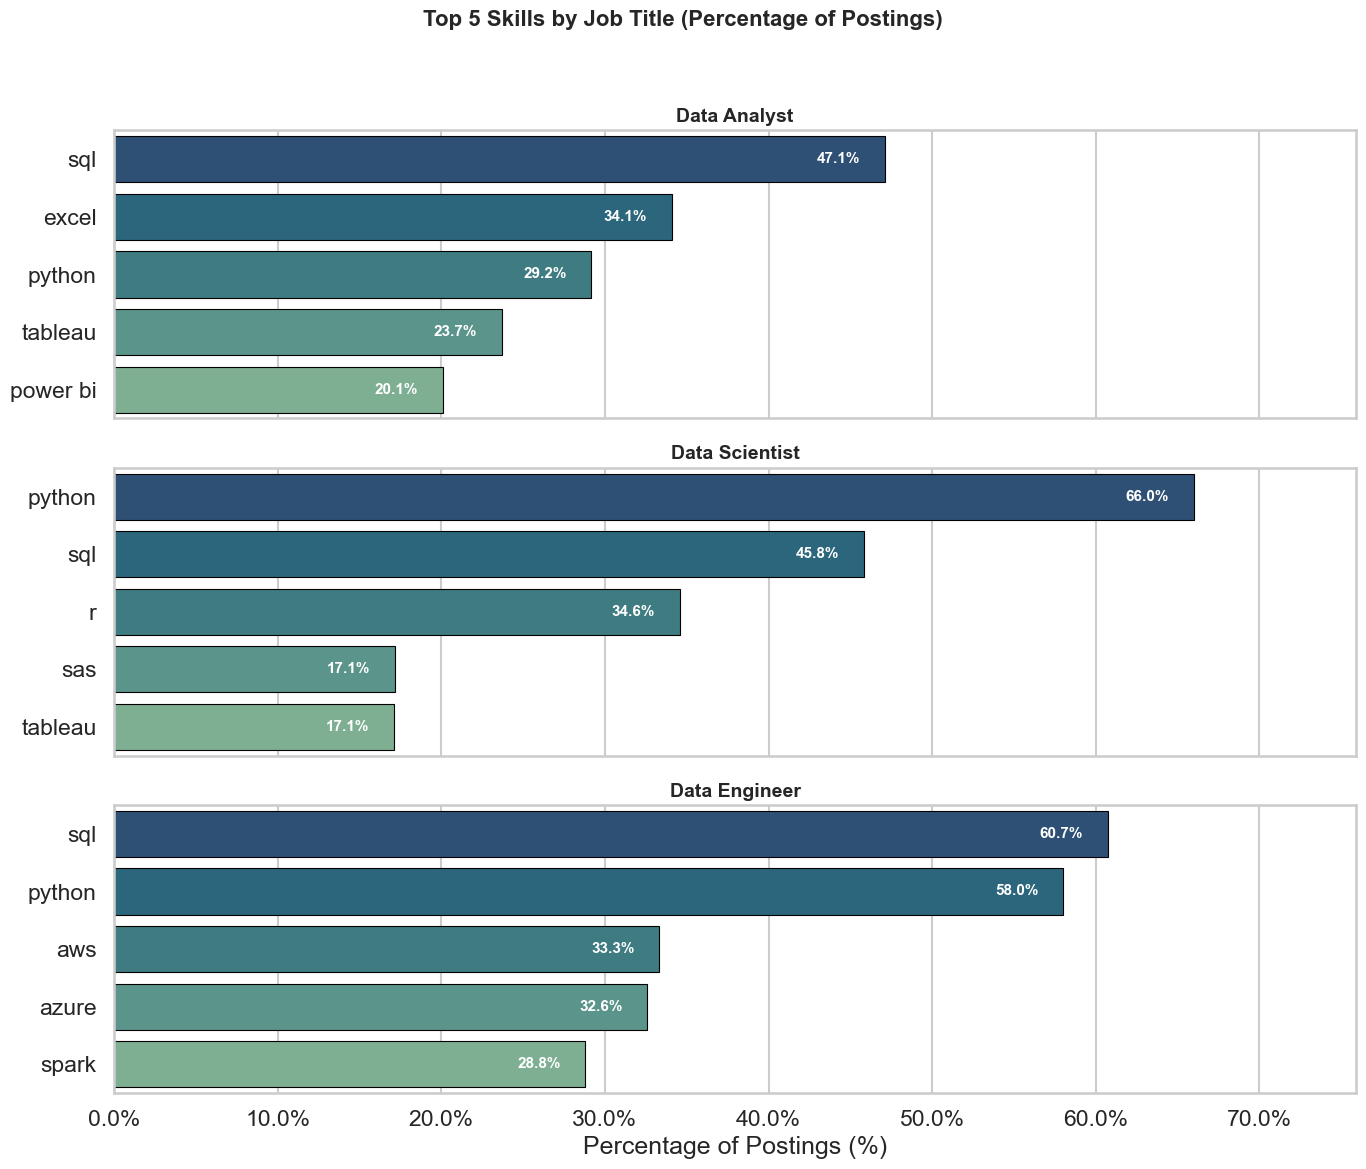

In [39]:
# Improved percentage-based plot with a consistent x-limit, inverted y-axes, and a new color style
import matplotlib.ticker as mtick
sns.set_style('whitegrid')
sns.set_context('talk')
fig, ax = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

# Precompute top-5 percentage series for each job title so we can set a common x-limit
skill_pcts = {}
for job_title in job_titles:
    total_posts = df[df['job_title_short'] == job_title].shape[0]
    job_data = df_jobs[df_jobs['job_title_short'] == job_title]
    top_skills_counts = job_data['job_skills'].value_counts().head(5)
    top_skills_pct = (top_skills_counts / total_posts) * 100
    skill_pcts[job_title] = top_skills_pct

# Determine a common x-limit across all job titles
global_max = max([s.max() if len(s) > 0 else 0 for s in skill_pcts.values()])
xlim_max = global_max * 1.15 if global_max > 0 else 1

for i, job_title in enumerate(job_titles):
    top_skills_pct = skill_pcts[job_title].sort_values()
    n = len(top_skills_pct)
    if n == 0:
        ax[i].text(0.5, 0.5, 'No skills data', ha='center', va='center', transform=ax[i].transAxes)
        continue

    
    palette = sns.color_palette('magma', n)

    sns.barplot(x=top_skills_pct.values, y=top_skills_pct.index, palette="crest", hue=top_skills_pct.index, ax=ax[i], orient='h', edgecolor='black', linewidth=0.8)

    ax[i].set_title(f'{job_title}', fontsize=14, weight='bold')
    ax[2].set_xlabel('Percentage of Postings (%)' if i == len(job_titles) - 1 else '')
    ax[i].set_xlim(0, xlim_max)
    ax[i].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x:.1f}%"))
    ax[i].set_ylabel('')

    # Invert y-axis so highest percentages appear at the top
    ax[i].invert_yaxis()


    # Add value labels: inside bars if there's room, otherwise outside
    for p in ax[i].patches:
        width = p.get_width()
        y = p.get_y() + p.get_height() / 2
        if width > xlim_max * 0.06:
            ax[i].text(width - xlim_max * 0.02, y, f'{width:.1f}%', va='center', ha='right', color='white', fontsize=11, weight='bold')
        else:
            ax[i].text(width + xlim_max * 0.01, y, f'{width:.1f}%', va='center', fontsize=11)

# Overall title and layout
plt.suptitle('Top 5 Skills by Job Title (Percentage of Postings)', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()